<a href="https://colab.research.google.com/github/ph0810/TimeSeries/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python --version


Python 3.6.9


In [ ]:
%cd /content/drive/My Drive/Pj1/ai
!ls

/content/drive/My Drive/Pj1/ai
nbeats-training-checkpoint.th  NN5.csv	NN5.gsheet  NN5.ipynb  prophet.ipynb


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import to_datetime
df=pd.read_csv("NN5.csv")
df=df[0:735]
print(df)
df['Date']= to_datetime(df['Date'])



           Date  NN5-001  NN5-002  NN5-003  ...  NN5-108  NN5-109  NN5-110  NN5-111
0    1996-03-18   13.407   11.550    5.641  ...    9.297   10.417   11.635    8.338
1    1996-03-19   14.725   13.591   14.399  ...   12.429   14.923   10.587    9.876
2    1996-03-20   20.564   15.037   24.419  ...   13.251   25.865   12.571   16.320
3    1996-03-21   34.708   21.570   28.784  ...   24.816   37.996   17.517   22.554
4    1996-03-22   26.630   19.444   20.621  ...   19.232   33.291   24.291   18.096
..          ...      ...      ...      ...  ...      ...      ...      ...      ...
730  1998-03-18   30.088   18.750      NaN  ...   14.867   33.277   16.355   19.108
731  1998-03-19   54.138   29.677   21.684  ...   29.110   49.957   25.071   25.513
732  1998-03-20   53.501   30.726   35.587  ...    2.778   43.311   25.255   22.028
733  1998-03-21   39.697   16.738   18.637  ...    0.000   19.785   21.939   10.679
734  1998-03-22   29.705   12.046   13.095  ...   11.777   20.578   18.509  

In [ ]:
from fbprophet import Prophet
from matplotlib import pyplot

In [ ]:
model = Prophet()

In [ ]:
df1=df[["Date","NN5-001"]]
df1.columns = ['ds', 'y']
model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
import datetime
i=23
future=[]
while i<=31:
 x = datetime.datetime(1998, 3, i)
 x=x.strftime("%Y-%m-%d")
 future.append(x)
 i=i+1
i=1
while i<=21:
  x = datetime.datetime(1998, 4, i)
  x=x.strftime("%Y-%m-%d")
  future.append(x)
  i=i+1
print(future)



['1998-03-23', '1998-03-24', '1998-03-25', '1998-03-26', '1998-03-27', '1998-03-28', '1998-03-29', '1998-03-30', '1998-03-31', '1998-04-01', '1998-04-02', '1998-04-03', '1998-04-04', '1998-04-05', '1998-04-06', '1998-04-07', '1998-04-08', '1998-04-09', '1998-04-10', '1998-04-11', '1998-04-12', '1998-04-13', '1998-04-14', '1998-04-15', '1998-04-16', '1998-04-17', '1998-04-18', '1998-04-19', '1998-04-20', '1998-04-21']


In [ ]:
from pandas import DataFrame

In [ ]:
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [ ]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast,figsize=(15, 5))
pyplot.show()

          ds       yhat  yhat_lower  yhat_upper
0 1998-03-23  28.696393   19.812435   37.230087
1 1998-03-24  34.875699   26.323633   43.147661
2 1998-03-25  41.651287   33.678221   51.031324
3 1998-03-26  54.945642   46.347042   63.545246
4 1998-03-27  45.923843   37.644793   55.262462


TypeError: ignored

In [ ]:
print(forecast[['ds', 'yhat']])

           ds       yhat
0  1998-03-23  28.696393
1  1998-03-24  34.875699
2  1998-03-25  41.651287
3  1998-03-26  54.945642
4  1998-03-27  45.923843
5  1998-03-28  34.901322
6  1998-03-29  34.091551
7  1998-03-30  30.986887
8  1998-03-31  36.942337
9  1998-04-01  43.457184
10 1998-04-02  56.459113
11 1998-04-03  47.119268
12 1998-04-04  35.759861
13 1998-04-05  34.601689
14 1998-04-06  31.144797
15 1998-04-07  36.752039
16 1998-04-08  42.930504
17 1998-04-09  55.615439
18 1998-04-10  45.985103
19 1998-04-11  34.368195
20 1998-04-12  32.991196
21 1998-04-13  29.358881
22 1998-04-14  34.837762
23 1998-04-15  40.937409
24 1998-04-16  53.594318
25 1998-04-17  43.986731
26 1998-04-18  32.442065
27 1998-04-19  31.184299
28 1998-04-20  27.714548
29 1998-04-21  33.394616


In [ ]:
future1=df1['ds'][-50:].values
future1= DataFrame(future1)
future1.columns = ['ds']
future1['ds']= to_datetime(future1['ds'])
print(future1)
forecast = model.predict(future1)

           ds
0  1998-02-01
1  1998-02-02
2  1998-02-03
3  1998-02-04
4  1998-02-05
5  1998-02-06
6  1998-02-07
7  1998-02-08
8  1998-02-09
9  1998-02-10
10 1998-02-11
11 1998-02-12
12 1998-02-13
13 1998-02-14
14 1998-02-15
15 1998-02-16
16 1998-02-17
17 1998-02-18
18 1998-02-19
19 1998-02-20
20 1998-02-21
21 1998-02-22
22 1998-02-23
23 1998-02-24
24 1998-02-25
25 1998-02-26
26 1998-02-27
27 1998-02-28
28 1998-03-01
29 1998-03-02
30 1998-03-03
31 1998-03-04
32 1998-03-05
33 1998-03-06
34 1998-03-07
35 1998-03-08
36 1998-03-09
37 1998-03-10
38 1998-03-11
39 1998-03-12
40 1998-03-13
41 1998-03-14
42 1998-03-15
43 1998-03-16
44 1998-03-17
45 1998-03-18
46 1998-03-19
47 1998-03-20
48 1998-03-21
49 1998-03-22


[24.221 21.4   28.741 36.196 60.19  42.205 24.306 29.833 20.181 28.784
 41.128 58.659 49.83  32.214 26.304 23.895 34.07  41.213 57.752 42.219
 30.938 25.865 21.23  29.734 42.871 62.472 45.493 33.489 18.608 24.334
 26.927 40.717 54.535 46.57  10.601  4.124 12.146 30.669 38.634 60.162
 47.166 37.16  24.986 19.7   32.341 30.088 54.138 53.501 39.697 29.705]
MAE: 5.294


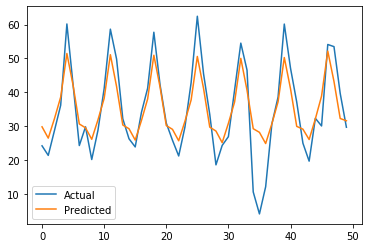

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = df1['y'][-50:].values
print(y_true)
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
pip install --target=/usr/local/python3/lib/python3.6/site-packages --upgrade atspy


Processing /root/.cache/pip/wheels/ac/2e/4b/114d30f1e5e8763c05a3a6964efc758b07ab2dc26530bec443/atspy-0.2.8-cp36-none-any.whl
  Using cached tsfresh-0.14.1-py2.py3-none-any.whl (77 kB)
  Using cached tensorflow-1.15.0-cp36-cp36m-manylinux2010_x86_64.whl (412.3 MB)
Processing /root/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006/tflearn-0.3.2-cp36-none-any.whl
  Using cached pip_tools-4.2.0-py2.py3-none-any.whl (40 kB)
  Using cached matplotlib-3.1.2-cp36-cp36m-manylinux1_x86_64.whl (13.1 MB)
Processing /root/.cache/pip/wheels/34/38/9a/39028cefc7b8324d53649916acff87936d908b60e58acbda4c/psutil-5.4.8-cp36-cp36m-linux_x86_64.whl
  Using cached torch-1.4.0-cp36-cp36m-manylinux1_x86_64.whl (753.4 MB)
  Using cached typing_extensions-3.6.6-py3-none-any.whl (16 kB)
  Using cached cachetools-4.0.0-py3-none-any.whl (10 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)
  Using cached mxnet_cu100-1.4.1-py2.py3-none-manylinux1_x86_64.whl (488.3 M

In [ ]:
 pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)


In [ ]:
pip install example --use-feature=2020-resolver

  Created wheel for example: filename=example-0.1.0-py3-none-any.whl size=1239 sha256=748c0ba8dbd0c70d3bb3bcb6fceaf3c3f55831b0f058c27576b18d6067dfef68
  Stored in directory: /root/.cache/pip/wheels/b0/d5/18/114633c655bb2f1fd4c05e9fd6c799fed5026926b6fba555da
Successfully built example


In [ ]:
!python3.8 setup.py

python3.8: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
from atspy import AutomatedModel

INFO:root:Using CPU


In [ ]:
!pip install pigar

In [ ]:
df=df[["Date","NN5-001"]]
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date"); df

,NN5-001
Date,
1996-03-18,13.407
1996-03-19,14.725
1996-03-20,20.564
1996-03-21,34.708
1996-03-22,26.630
...,...
1998-03-18,30.088
1998-03-19,54.138
1998-03-20,53.501


In [ ]:
 df=df.fillna(df.mean()) 

In [ ]:
model_list=["NBEATS", "TBAT", "TATS", "TBATS1", "TBATP1", "TBATS2"]
am = AutomatedModel(df=df, model_list=model_list, season="infer_from_data",forecast_len=60 )
forecast_in,perfomance= am.forecast_insample()
forecast_out = am.forecast_outsample()

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
551
An insample split of training size 551 and testing size 184 has been constructed
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=184, forecast_length=184, share_thetas=False) at @139928771743192
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=184, forecast_length=184, share_thetas=False) at @139928771743640
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=184, forecast_length=184, share_thetas=False) at @139928764162512
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=184, forecast_length=184, share_thetas=False) at @139928764163016
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Model TATS is being trained for in sample prediction
The following set of plausible SSA seasonalities have been identified: {7}
Model TBATS1 is being trained for in sample prediction
Model TBATP1 is being trained for in sample prediction
Model TBATS2 is being trained for in sample prediction
The following set of plausible SSA seasonalities have been identified: {4, 7}
Model NBEATS is being used to forcast in sample
Model TBAT is being used to forcast in sample
Model TATS is being used to forcast in sample
Model TBATS1 is being used to forcast in sample
Model TBATP1 is being used to forcast in sample
Model TBATS2 is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(un

In [ ]:
all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)

Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
678  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble


In [ ]:
forecast_out.head()

,NBEATS,TBAT,TATS,TBATS1,TBATP1,TBATS2
Date,,,,,,
1998-03-23,51.521034,34.811997,26.999025,26.999025,26.999025,26.791996
1998-03-24,40.039261,34.849588,32.481634,32.481634,32.481634,33.494481
1998-03-25,28.903126,34.883238,38.669156,38.669156,38.669156,39.045353
1998-03-26,18.325396,34.913358,51.446627,51.446627,51.446627,50.574387
1998-03-27,11.154381,34.940321,41.691394,41.691394,41.691394,41.432945


In [ ]:
perfomance

,Target,NBEATS,TBAT,TATS,TBATS1,TBATP1,TBATS2
rmse,0.000000,11.168242,14.113961,10.207805,10.207805,10.207805,10.158331
mse,0.000000,124.729621,199.203889,104.199280,104.199280,104.199280,103.191694
mean,34.075217,38.144417,33.878680,32.891824,32.891824,32.891824,32.901282


In [ ]:
all_performance

,rmse,mse,mean
TBATS2,9.127029,83.302655,33.080246
TBATS2__X__TBATS2_TATS,9.133624,83.423086,33.079596
TBATS2__X__TBATS2_TATS__X__TBATS2_TATS_TBATS1,9.137948,83.502088,33.079236
TBATS2_TATS,9.141745,83.571509,33.078947
TBATS2__X__TBATS2_TATS__X__TBATS2_TATS_TBATS1__X__TBATS2_TATS_TBATS1_TBATP1__X__TATS,9.144791,83.627204,33.078730
TBATS2_TATS_TBATS1,9.148006,83.686009,33.078514
TBATS2__X__TBATS2_TATS__X__TBATS2_TATS_TBATS1__X__TBATS2_TATS_TBATS1_TBATP1__X__TATS__X__TBATS1__X__TBATP1,9.149435,83.712163,33.078421
TBATS2_TATS_TBATS1_TBATP1,9.151389,83.747924,33.078298
TATS,9.162550,83.952331,33.077648
TBATS1,9.162550,83.952331,33.077648


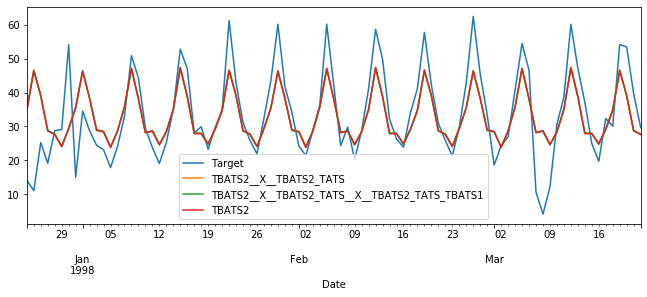

In [ ]:
all_ensemble_in[["Target","TBATS2__X__TBATS2_TATS","TBATS2__X__TBATS2_TATS__X__TBATS2_TATS_TBATS1","TBATS2"]].plot()

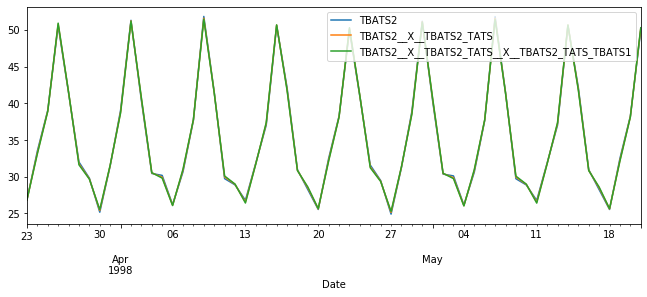

In [ ]:
all_ensemble_out[["TBATS2","TBATS2__X__TBATS2_TATS","TBATS2__X__TBATS2_TATS__X__TBATS2_TATS_TBATS1"]].plot()

In [ ]:
am.models_dict_in

{'NBEATS': {'constant': 75.95, 'model': NBeatsNet(
    (parameters): ParameterList(
        (0): Parameter containing: [torch.FloatTensor of size 128x184]
        (1): Parameter containing: [torch.FloatTensor of size 128]
        (2): Parameter containing: [torch.FloatTensor of size 128x128]
        (3): Parameter containing: [torch.FloatTensor of size 128]
        (4): Parameter containing: [torch.FloatTensor of size 128x128]
        (5): Parameter containing: [torch.FloatTensor of size 128]
        (6): Parameter containing: [torch.FloatTensor of size 128x128]
        (7): Parameter containing: [torch.FloatTensor of size 128]
        (8): Parameter containing: [torch.FloatTensor of size 7x128]
        (9): Parameter containing: [torch.FloatTensor of size 7x128]
        (10): Parameter containing: [torch.FloatTensor of size 184x7]
        (11): Parameter containing: [torch.FloatTensor of size 184]
        (12): Parameter containing: [torch.FloatTensor of size 184x7]
        (13): Para

In [ ]:
am.models_dict_out

{'NBEATS': {'model': NBeatsNet(
    (parameters): ParameterList(
        (0): Parameter containing: [torch.FloatTensor of size 128x60]
        (1): Parameter containing: [torch.FloatTensor of size 128]
        (2): Parameter containing: [torch.FloatTensor of size 128x128]
        (3): Parameter containing: [torch.FloatTensor of size 128]
        (4): Parameter containing: [torch.FloatTensor of size 128x128]
        (5): Parameter containing: [torch.FloatTensor of size 128]
        (6): Parameter containing: [torch.FloatTensor of size 128x128]
        (7): Parameter containing: [torch.FloatTensor of size 128]
        (8): Parameter containing: [torch.FloatTensor of size 7x128]
        (9): Parameter containing: [torch.FloatTensor of size 7x128]
        (10): Parameter containing: [torch.FloatTensor of size 60x7]
        (11): Parameter containing: [torch.FloatTensor of size 60]
        (12): Parameter containing: [torch.FloatTensor of size 60x7]
        (13): Parameter containing: [torc